In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Task 1:  Data Acquisition and Cleaning

## Facilities Dataset

In [3]:
df_facility = pd.read_csv("dataset/Facilities.txt", error_bad_lines=False, delimiter= '|')
df_facility.head(2)

,Facility_Name,Facility_Location_Code,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,Novant Health UVA Haymarket Medical Center,216,Free Standing Emergency Room,Hospital (General),38.423916,77.401647,"15225 Heathcote Blvd, Haymarket, Virginia, 201..."
1,Kaiser Permanente - Tysons Corner - Advanced U...,700,Free Standing Emergency Room,NaN,38.929137,77.224601,"8008 Westpark Drive, McLean, Virginia, 22102, ..."


In [4]:
df_facility.shape

(32, 7)

In [5]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Full_Address                 0
Facility_Type_Of_Facility             2
Facility_Latitude                     3
Facility_Longitude                    3
Facility_Hospital_Designation_List    7
dtype: int64

In [6]:
df_facility

,Facility_Name,Facility_Location_Code,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,Novant Health UVA Haymarket Medical Center,216,Free Standing Emergency Room,Hospital (General),38.423916,77.401647,"15225 Heathcote Blvd, Haymarket, Virginia, 201..."
1,Kaiser Permanente - Tysons Corner - Advanced U...,700,Free Standing Emergency Room,NaN,38.929137,77.224601,"8008 Westpark Drive, McLean, Virginia, 22102, ..."
2,Landing Zone / Non-Hospital,107,NaN,NaN,NaN,NaN,United States
3,MWHC Stafford Hospital,116,Hospital,Hospital (General),38.415254,-77.407458,"101 Hospital Center Blvd, Stafford, Virginia, ..."
4,Kaiser Permanente - Woodbridge - Advanced Urge...,701,Free Standing Emergency Room,NaN,38.638379,77.293984,"14139 Potomac Mills Road, Woodbridge, Virginia..."
5,Merrifield Mental Health,106,Mental Health Facility,Behavioral Health,38.863468,77.234211,"8221 Willow Oaks Corporate Drive, City of Fair..."
6,Walter Reed National Military Medical Center,386,Hospital,"Hospital (General),Level II Trauma Center",39.000339,77.094867,"4494 Palmer Rd N, Bethesda, Maryland, 20814, ..."
7,Suburban Hospital,385,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.997653,77.110001,"8600 Old Georgetown Rd, Bethesda, Maryland, 2..."
8,Landing Zone,999,NaN,NaN,NaN,NaN,"Virginia, United States"
9,Inova Mount Vernon Hospital,47,Hospital,Hospital (General),38.740569,77.077442,"2501 Parkers Lane, Hollin Hills, Virginia, 223..."


#### Dealing with null values for Facilities dataset

#### Feature - latitude and longitude

In [8]:
 # Virginia fire and rescue latitude and longitude 38.9317° N, 77.1777° W - default
# Ideally these latitude and longitude to be filled with the final hospital destination taken
# facility_name = Landing zone, non hospital 

In [9]:
df_facility.Facility_Latitude.fillna(38.9317, inplace=True)

In [10]:
df_facility.Facility_Longitude.fillna(77.1777, inplace=True)

In [11]:
# otherway of handling null
# df_facility['Facility_Longitude'].fillna(df_facility['Facility_Longitude'].mean(), inplace = True)

In [12]:
df_facility.Facility_Name.unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

#### Referred hospital description for filling missing values


|  Facility_Name  | Facility_Hospital_Designation_List | Check with partners |
| --- | --- | --- |
| Landing Zone / Non-Hospital	 | non hospital | Confirmed |
|Kaiser Permanente - Tysons Corner - Advanced U...|Hospital General | Confirmed |
|MedStar Southern Maryland Hospital Center | Hospital(General), Burns, Stroke, trauma | Confirmed|
|HCA StoneSprings Hospital Center|Hospital General | Confirmed|
|Out Of Area Hospital Not Listed	 | Hospital General  |Confirmed|

#### Feature - Facility_Hospital_Designation_List

In [15]:


df_facility.loc[ df_facility['Facility_Name'].isin(['Kaiser Permanente - Tysons Corner - Advanced Urgent Care','Kaiser Permanente - Woodbridge - Advanced Urgent Care','HCA StoneSprings Hospital Center', 'Out Of Area Hospital Not Listed']), 'Facility_Hospital_Designation_List'] = 'Hospital(General)'

In [16]:

df_facility.loc[ df_facility['Facility_Name'].isin(['Landing Zone / Non-Hospital','Landing Zone']), 'Facility_Hospital_Designation_List'] = 'Non Hospital'

In [17]:

df_facility.loc[ df_facility['Facility_Name'].isin(['MedStar Southern Maryland Hospital Center']), 'Facility_Hospital_Designation_List'] = 'Hospital(General), Burns, Stroke, trauma'

#### Feature - Facility_Type_Of_Facility

In [13]:
df_facility.Facility_Type_Of_Facility.fillna('Non hospital service', inplace=True)

In [18]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Type_Of_Facility             0
Facility_Hospital_Designation_List    0
Facility_Latitude                     0
Facility_Longitude                    0
Facility_Full_Address                 0
dtype: int64

## Master Dataset

In [33]:
df_master = pd.read_csv("C:\\users\\suraj\\Downloads\\MasterDataWithAge.txt", error_bad_lines=False, delimiter= '|')
df_master.head(2)

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,...,PatientID,PatientAge,PrimaryImpression,SecondaryImpression,PatientDisposition,ProcedurePrimaryKey,ProcedurePerformed,MedicationPrimaryKey,MedicationGiven,isALS_LOC
0,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164292.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
1,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN,False


In [34]:
df_master.columns

Index(['PrimaryKey', 'CallConfirmedDT', 'ShiftDay', 'TourOfShift',
       'IncidentFirstDue', 'InitialIncidentType', 'DispatchedIncidentType',
       'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'MutualAidReceived', 'ResponseUnitID',
       'TransportUnitID', 'TransportUnitLOC', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitStation', 'UnitType', 'UnitArrivalOrder',
       'UnitTransportedDT', 'UnitTransportedArrivalDT', 'PersonnelID',
       'PersonnelRole', 'TransportLOC', 'TransportHospitalCode',
       'TransportHospitalName', 'ReasonForChoosingHospital', 'PatientID',
       'PatientAge', 'PrimaryImpression', 'SecondaryImpression',
       'PatientDisposition', 'ProcedurePrimaryKey', 'ProcedurePerformed',
       'MedicationPrimaryKey', 'MedicationGiven', 'isALS_LOC'],
      dtype='object')

In [35]:
df_master.shape

(1357009, 37)

In [36]:
df_master.isnull().sum().sort_values().tail(22)

ShiftDay                             0
PersonnelID                          2
PatientAge                          12
SecondaryImpression                 20
PrimaryImpression                   20
IncidentFirstDue                    78
UnitPrimaryActionTaken             109
FinalIncidentTypeDescription       247
UnitStation                        362
ArrivedIncidentType               1682
TransportLOC                      4946
ReasonForChoosingHospital         5078
TransportHospitalCode             5082
TransportHospitalName             5082
UnitArrivalOrder                112491
ProcedurePrimaryKey             293508
ProcedurePerformed              293508
MedicationPrimaryKey            614415
MedicationGiven                 614449
UnitTransportedDT               775277
UnitTransportedArrivalDT        781587
UnitOtherActionsTaken           836476
dtype: int64

#### Dealing with null values for Master dataset

#### Feature - UnitOtherActionsTaken           

In [37]:
print(f"% of null value in UnitOtherActionsTaken : {(df_master.UnitOtherActionsTaken.isnull().sum() / len(df_master)) * 100}")

% of null value in UnitOtherActionsTaken : 61.641153448503296


In [38]:
df_master.UnitOtherActionsTaken.describe()

count               520533
unique                 852
top       Transport person
freq                328792
Name: UnitOtherActionsTaken, dtype: object

In [39]:
df_master['UnitOtherActionsTaken'].value_counts(dropna=False)

NaN                                                                                      836476
Transport person                                                                         328792
Provide manpower                                                                          81416
Provide advanced life support (ALS)                                                       42372
Provide basic life support (BLS)                                                          14655
                                                                                          ...  
Control traffic,Provide Ground Ladders                                                        2
Remove water                                                                                  2
Provide basic life support (BLS),Provide manpower,Provide equipment,Control crowd             2
Ventilate,Provide manpower,Provide apparatus,Provide equipment,Provide Ground Ladders         2
Establish safe area,Investigate         

In [ ]:
# Week 6 Tasks ########

In [41]:
# Replacing null values for column 'UnitOtherActionsTaken' with value 'Unknown Unit' which contributes to 61.64 % of total values
df_master['UnitOtherActionsTaken'].fillna('no other action', inplace = True)


In [40]:
df_master

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,...,PatientID,PatientAge,PrimaryImpression,SecondaryImpression,PatientDisposition,ProcedurePrimaryKey,ProcedurePerformed,MedicationPrimaryKey,MedicationGiven,isALS_LOC
0,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164292.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
1,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN,False
2,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
3,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288.0,IV Start - Extremity Vein (arm or leg),NaN,NaN,False
4,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291.0,CV - ECG - 12 Lead Obtained,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357004,1204150720,2020-08-12 12:15:23,B,1,415.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,1319845,30 - 39,CV - Chest Pain - Presumed Cardiac (I20.9),Not Applicable,Treated & Transported,1232196.0,CV - ECG - 12 Lead Obtained,432191.0,"Acetylsalicylic Acid (Aspirin, ASA)",True
1357005,1204150720,2020-08-12 12:15:23,B,1,415.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,1319845,30 - 39,CV - Chest Pain - Presumed Cardiac (I20.9),Not Applicable,Treated & Transported,1232196.0,CV - ECG - 12 Lead Obtained,432193.0,Nitroglycerin,True
1357006,1204150720,2020-08-12 12:15:23,B,1,415.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,1319845,30 - 39,CV - Chest Pain - Presumed Cardiac (I20.9),Not Applicable,Treated & Transported,1232196.0,CV - ECG - 12 Lead Obtained,432193.0,Nitroglycerin,True
1357007,1204150720,2020-08-12 12:15:23,B,1,415.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,1319845,30 - 39,CV - Chest Pain - Presumed Cardiac (I20.9),Not Applicable,Treated & Transported,1232195.0,IV Start - Extremity Vein (arm or leg),432193.0,Nitroglycerin,True


In [42]:
# Replaced all the null values of 'Medication Given' column with 'No medication given'
df_master['MedicationGiven'].fillna('No Medication Given', inplace = True)

In [43]:
# Replaced all the null values of 'Medication primarykey' column with '0'
df_master['MedicationPrimaryKey'].fillna('0', inplace = True)

In [44]:
# Replaced all the null values of 'ProcedurePerformed' column with 'no Procedure Performed'
df_master['ProcedurePerformed'].fillna('no Procedure Performed', inplace = True)

In [45]:
# Replaced all the null values of 'ProcedurePrimaryKey' column with '0'
df_master['ProcedurePrimaryKey'].fillna('0', inplace = True)

In [46]:
# Replaced all the null values of 'TransportHospitalName' column with 'No Hospital service'
df_master['TransportHospitalName'].fillna('No Hospital service', inplace = True)

In [47]:
## Replaced all the null values of 'TransportHospitalCode' column with '0'
df_master['TransportHospitalCode'].fillna('0', inplace = True)

In [48]:
# Replaced all the null values of 'ReasonForChoosingHospital' column with 'No Hospital service'
df_master['ReasonForChoosingHospital'].fillna('No Hospital service', inplace = True)

In [50]:
# Reading Data set to the new .csv file and performed data management on column PersonnelRole. 
## Splitted PersonnelRole column into 4 new colums 
df_master.to_csv('Cleaneddatanew.csv')

In [66]:
# Loading the new cleaned data set into python
df_master1 = pd.read_csv("C:\\Users\\suraj\\Downloads\\Cleaneddatanew.csv")

In [67]:
df_master1

,Unnamed: 0,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,...,PatientID,PatientAge,PrimaryImpression,SecondaryImpression,PatientDisposition,ProcedurePrimaryKey,ProcedurePerformed,MedicationPrimaryKey,MedicationGiven,isALS_LOC
0,0,1074428032,5/28/2019 0:45,C,3,442.0,ALS,ALS,ALS,ALS,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164292,CV - ECG - 12 Lead Obtained,0,No Medication Given,False
1,1,1074428032,5/28/2019 0:45,C,3,442.0,ALS,ALS,ALS,ALS,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288,IV Start - Extremity Vein (arm or leg),0,No Medication Given,False
2,2,1074428032,5/28/2019 0:45,C,3,442.0,ALS,ALS,ALS,ALS,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291,CV - ECG - 12 Lead Obtained,0,No Medication Given,False
3,3,1074428032,5/28/2019 0:45,C,3,442.0,ALS,ALS,ALS,ALS,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164288,IV Start - Extremity Vein (arm or leg),0,No Medication Given,False
4,4,1074428032,5/28/2019 0:45,C,3,442.0,ALS,ALS,ALS,ALS,...,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164291,CV - ECG - 12 Lead Obtained,0,No Medication Given,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1194216785,7/14/2020 9:23,C,3,421.0,CPRF,CPRF,CPRF,CPRF,...,1295139,30 - 39,Abuse of Narcotic / Opioid / Heroin (Overdose)...,Not Applicable,Treated & Transported,1227632,Airway - Nasopharyngeal Insertion,430643,Naloxone (Narcan),False
1048571,1048571,1194216785,7/14/2020 9:23,C,3,421.0,CPRF,CPRF,CPRF,CPRF,...,1295139,30 - 39,Abuse of Narcotic / Opioid / Heroin (Overdose)...,Not Applicable,Treated & Transported,1227633,Resp - Assist Ventilation - BVM Via Mask,430645,Naloxone (Narcan),False
1048572,1048572,1194216785,7/14/2020 9:23,C,3,421.0,CPRF,CPRF,CPRF,CPRF,...,1295139,30 - 39,Abuse of Narcotic / Opioid / Heroin (Overdose)...,Not Applicable,Treated & Transported,1227634,IV Start - Extremity Vein (arm or leg),430644,Naloxone (Narcan),False
1048573,1048573,1194216785,7/14/2020 9:23,C,3,421.0,CPRF,CPRF,CPRF,CPRF,...,1295139,30 - 39,Abuse of Narcotic / Opioid / Heroin (Overdose)...,Not Applicable,Treated & Transported,1227635,CV - ECG - 12 Lead Obtained,430643,Naloxone (Narcan),False


In [72]:
## Cleaning Null values of 'PersonnelRole' Column
df_master1['PersonnelRole1'].fillna('No role', inplace = True)

In [73]:
df_master1['PersonnelRole2'].fillna('No role', inplace = True)

In [74]:
df_master1['PersonnelRole3'].fillna('No role', inplace = True)

In [75]:
df_master1['PersonnelRole4'].fillna('No role', inplace = True)

In [78]:
df_master1.isnull().sum().sort_values().tail(40)

MedicationPrimaryKey                 0
ProcedurePerformed                   0
ProcedurePrimaryKey                  0
PatientDisposition                   0
PatientID                            0
ReasonForChoosingHospital            0
TransportHospitalName                0
TransportHospitalCode                0
PersonnelRole4                       0
PersonnelRole3                       0
PersonnelRole2                       0
PersonnelRole1                       0
MedicationGiven                      0
UnitType                             0
UnitOtherActionsTaken                0
isALS_LOC                            0
FinalIncidentType                    0
InitialIncidentType                  0
DispatchedIncidentType               0
ShiftDay                             0
MutualAidReceived                    0
ResponseUnitID                       0
TourOfShift                          0
CallConfirmedDT                      0
TransportUnitID                      0
PrimaryKey               

In [ ]:
## End of Data cleaning ##

#### Feature - UnitTransportedArrivalDT     

q: Ask stakeholder how to fill empty values. Can you use any other date column here?

In [10]:
print(f"% of null value in UnitTransportedArrivalDT : {(df_master.UnitTransportedArrivalDT.isnull().sum() / len(df_master)) * 100 }")


% of null value in UnitTransportedArrivalDT : 57.59630186682624


In [11]:
df_master.UnitTransportedArrivalDT.describe()

count                  575422
unique                 122666
top       2019-09-25 17:22:05
freq                     1452
Name: UnitTransportedArrivalDT, dtype: object

In [12]:
# Retrieving the Frequency distribution statistics 
UnitTransportedArrivalDT_count = df_master['UnitTransportedArrivalDT'].value_counts().head(5)
print('Frequency distribution of UnitTransportedArrivalDT values: \n',UnitTransportedArrivalDT_count)

Frequency distribution of UnitTransportedArrivalDT values: 
 2019-09-25 17:22:05    1452
2019-02-04 15:38:53    1365
2019-02-04 15:44:07    1365
2019-02-04 15:46:12    1365
2018-09-24 10:36:41    1056
Name: UnitTransportedArrivalDT, dtype: int64


In [13]:
# Retrieving the Frequency distribution statistics 
UnitTransportedArrivalDT_count_tail = df_master['UnitTransportedArrivalDT'].value_counts().tail(5)
print('Frequency distribution of UnitTransportedArrivalDT values: \n',UnitTransportedArrivalDT_count_tail)

Frequency distribution of UnitTransportedArrivalDT values: 
 2018-11-13 13:09:55    2
2020-05-16 13:23:59    2
2019-04-27 02:01:50    2
2019-04-10 14:35:40    2
2020-05-08 14:15:51    2
Name: UnitTransportedArrivalDT, dtype: int64


#### Feature - UnitTransportedDT    

In [14]:
(df_master.UnitTransportedDT.isnull().sum() / len(df_master)) * 100 

57.131308635388564

In [15]:
df_master.UnitTransportedDT.describe()

count                  581732
unique                 123490
top       2019-09-25 17:07:59
freq                     1452
Name: UnitTransportedDT, dtype: object

In [16]:
# Retrieving the Frequency distribution statistics 
UnitTransportedDT_count = df_master['UnitTransportedDT'].value_counts().head(5)
print('Frequency distribution of UnitTransportedDT values: \n',UnitTransportedDT_count)

Frequency distribution of UnitTransportedDT values: 
 2019-09-25 17:07:59    1452
2019-02-04 15:26:18    1365
2019-02-04 15:38:51    1365
2019-02-04 15:28:14    1365
2018-09-24 10:28:29    1056
Name: UnitTransportedDT, dtype: int64


In [17]:
# Retrieving the Frequency distribution statistics 
UnitTransportedDT_count_tail = df_master['UnitTransportedDT'].value_counts().tail(5)
print('Frequency distribution of UnitTransportedDT values: \n',UnitTransportedDT_count_tail)

Frequency distribution of UnitTransportedDT values: 
 2019-11-29 08:34:24    2
2018-09-15 21:40:45    2
2020-03-07 00:28:40    2
2020-01-01 17:12:07    2
2020-02-15 12:58:11    2
Name: UnitTransportedDT, dtype: int64


#### Feature - MedicationGiven    
Can create a model/lookup table to predict missing data. Can we create a new categories as no medication/missing?

In [18]:
(df_master.MedicationGiven.isnull().sum() / len(df_master)) * 100 

45.279655477598155

In [19]:
df_master.MedicationGiven.describe()

count                               742560
unique                                  32
top       Epinephrine 0.1 MG/ML (1:10,000)
freq                                196894
Name: MedicationGiven, dtype: object

In [20]:
# Retrieving the Frequency distribution statistics 
MedicationGiven_count = df_master['MedicationGiven'].value_counts().head(5)
print('Frequency distribution of MedicationGiven values: \n',MedicationGiven_count)

Frequency distribution of MedicationGiven values: 
 Epinephrine 0.1 MG/ML (1:10,000)    196894
Oxygen                              116285
Normal saline                        91782
Fentanyl Citrate (Sublimaze)         47740
Ondansetron (Zofran)                 45334
Name: MedicationGiven, dtype: int64


In [21]:
# Retrieving the Frequency distribution statistics 
MedicationGiven_count_tail = df_master['MedicationGiven'].value_counts().tail(5)
print('Frequency distribution of MedicationGiven values: \n',MedicationGiven_count_tail)

Frequency distribution of MedicationGiven values: 
 Norepinephrine (Levophed)       838
Calcium Chloride (10%)          321
Morphine (Morphine Sulfate)     195
Tetracaine                      108
Diazepam (Valium)                 8
Name: MedicationGiven, dtype: int64


#### Feature - MedicationPrimaryKey     
Not a useful feature as it is a key and we can drop these feature.

In [22]:
(df_master.MedicationPrimaryKey.isnull().sum() / len(df_master)) * 100 

45.27714996731783

In [23]:
df_master.MedicationPrimaryKey.describe()

count    742594.000000
mean     408487.907334
std       25420.425095
min      336281.000000
25%      396939.000000
50%      413604.500000
75%      427997.000000
max      440723.000000
Name: MedicationPrimaryKey, dtype: float64

In [24]:
df_master.drop(columns="MedicationPrimaryKey", inplace=True)

#### Feature - ProcedurePerformed     
Build a model to predict missing values, or build a lookup table to fill missing values.

In [25]:
(df_master.ProcedurePerformed.isnull().sum() / len(df_master)) * 100 

21.62903856938311

In [26]:
df_master.ProcedurePerformed.describe()

count                                    1063501
unique                                        68
top       IV Start - Extremity Vein (arm or leg)
freq                                      318070
Name: ProcedurePerformed, dtype: object

In [27]:
# Retrieving the Frequency distribution statistics 
ProcedurePerformed_count = df_master['ProcedurePerformed'].value_counts(dropna=False).head(5)
print('Frequency distribution of ProcedurePerformed values: \n',ProcedurePerformed_count)

Frequency distribution of ProcedurePerformed values: 
 IV Start - Extremity Vein (arm or leg)    318070
NaN                                       293508
CV - ECG - 12 Lead Obtained               290178
CV - Defibrillation - Manual               65779
IO Start - Intraosseous Access             48596
Name: ProcedurePerformed, dtype: int64


In [28]:
# Retrieving the Frequency distribution statistics 
ProcedurePerformed_count_tail = df_master['ProcedurePerformed'].value_counts().tail(5)
print('Frequency distribution of ProcedurePerformed values: \n',ProcedurePerformed_count_tail)

Frequency distribution of ProcedurePerformed values: 
 OB - Childbirth - EMS Personnel Present     77
Intubation - Existing Tracheostomy Stoma    72
Enviro - Hypothermia Induction Therapy      46
Laryngoscopy - Indirect                     40
Infectious - Decontamination of Patient      8
Name: ProcedurePerformed, dtype: int64


#### Feature - ProcedurePrimaryKey     
Can this be used to fill missing values for other date columns - UnitTransportedArrivalDT.

In [29]:
(df_master.ProcedurePrimaryKey.isnull().sum() / len(df_master)) * 100

21.62903856938311

In [30]:
df_master.ProcedurePrimaryKey.describe()

count    1.063501e+06
mean     1.172048e+06
std      6.518121e+04
min      9.814640e+05
25%      1.144389e+06
50%      1.185039e+06
75%      1.220901e+06
max      1.256396e+06
Name: ProcedurePrimaryKey, dtype: float64

In [31]:
# Retrieving the Frequency distribution statistics 
ProcedurePrimaryKey_count = df_master['ProcedurePrimaryKey'].value_counts().head(5)
print('Frequency distribution of ProcedurePrimaryKey values: \n',ProcedurePrimaryKey_count)

Frequency distribution of ProcedurePrimaryKey values: 
 1173669.0    770
1173670.0    770
1173668.0    770
1183992.0    396
1183988.0    396
Name: ProcedurePrimaryKey, dtype: int64


In [32]:
# Retrieving the Frequency distribution statistics 
ProcedurePrimaryKey_count_tail = df_master['ProcedurePrimaryKey'].value_counts().tail(5)
print('Frequency distribution of ProcedurePrimaryKey values: \n',ProcedurePrimaryKey_count_tail)

Frequency distribution of ProcedurePrimaryKey values: 
 1157321.0    2
1159223.0    2
1243586.0    2
1200017.0    2
1216150.0    1
Name: ProcedurePrimaryKey, dtype: int64


#### Feature - UnitArrivalOrder

In [33]:
(df_master.UnitArrivalOrder.isnull().sum() / len(df_master)) * 100 

8.28962814542866

In [34]:
df_master.UnitArrivalOrder.describe()

count    1.244518e+06
mean     1.937690e+00
std      1.857566e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      1.000000e+02
Name: UnitArrivalOrder, dtype: float64

In [35]:
# Retrieving the Frequency distribution statistics 
UnitArrivalOrder_count = df_master['UnitArrivalOrder'].value_counts().head(5)
print('Frequency distribution of UnitArrivalOrder values: \n',UnitArrivalOrder_count)

Frequency distribution of UnitArrivalOrder values: 
 1.0    536497
2.0    511969
3.0    122180
4.0     32573
5.0     13332
Name: UnitArrivalOrder, dtype: int64


In [36]:
# Retrieving the Frequency distribution statistics 
UnitArrivalOrder_count_tail = df_master['UnitArrivalOrder'].value_counts().tail(5)
print('Frequency distribution of UnitArrivalOrder values: \n',UnitArrivalOrder_count_tail)

Frequency distribution of UnitArrivalOrder values: 
 70.0    2
96.0    2
98.0    2
56.0    2
88.0    2
Name: UnitArrivalOrder, dtype: int64


In [37]:
### Check for null values after data cleaning
df_master.isnull().sum().sort_values().tail(22)

isALS_LOC                            0
DispatchedIncidentType               0
InitialIncidentType                  0
PersonnelID                          2
PatientAge                          12
SecondaryImpression                 20
PrimaryImpression                   20
IncidentFirstDue                    78
UnitPrimaryActionTaken             109
FinalIncidentTypeDescription       247
UnitStation                        362
ArrivedIncidentType               1682
TransportLOC                      4946
ReasonForChoosingHospital         5078
TransportHospitalName             5082
TransportHospitalCode             5082
UnitArrivalOrder                112491
ProcedurePrimaryKey             293508
ProcedurePerformed              293508
MedicationGiven                 614449
UnitTransportedDT               775277
UnitTransportedArrivalDT        781587
dtype: int64

#### Task 1 Data cleaning ends ----------------------------

### Task 2- 

In [38]:
df_master.head(1)


,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,...,ReasonForChoosingHospital,PatientID,PatientAge,PrimaryImpression,SecondaryImpression,PatientDisposition,ProcedurePrimaryKey,ProcedurePerformed,MedicationGiven,isALS_LOC
0,1074428032,2019-05-28 00:45:44,C,3,442.0,ALS,ALS,ALS,ALS,ALS EMERGENCY,...,Patient's Choice,935111,30 - 39,Weakness (R53.1),"""Not Applicable""",Treated & Transported,1164292.0,CV - ECG - 12 Lead Obtained,NaN,False


Text(0.5, 0, 'Types of Incidents')

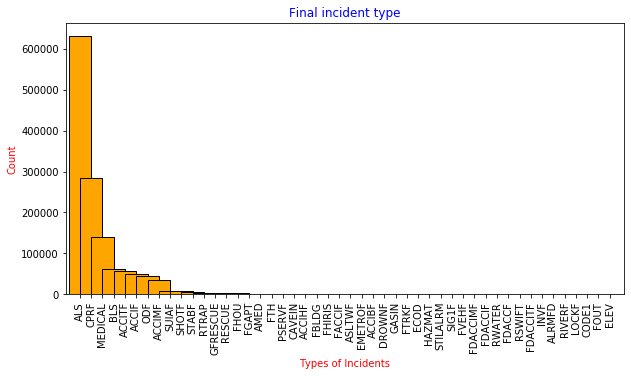

In [39]:
df_master["FinalIncidentType"].value_counts().plot(kind="bar",figsize=(10, 5), edgecolor="black", zorder=40, width=2,color="orange")
plt.title("Final incident type", color="Blue")
plt.ylabel("Count", color="Red")
plt.xlabel("Types of Incidents", color="Red")


Text(0.5, 0, 'unit types')

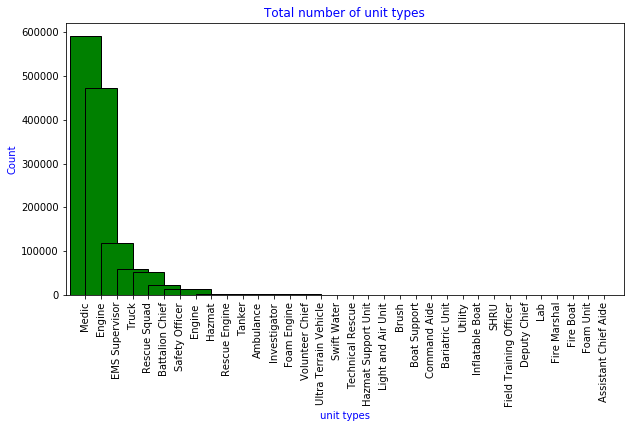

In [40]:
df_master["UnitType"].value_counts().plot(kind="bar",figsize=(10, 5), edgecolor="black", zorder=40, width=2,color="Green")
plt.title("Total number of unit types", color="Blue")
plt.ylabel("Count", color="blue")
plt.xlabel("unit types", color="blue")


In [41]:
print(df_master.columns)

Index(['PrimaryKey', 'CallConfirmedDT', 'ShiftDay', 'TourOfShift',
       'IncidentFirstDue', 'InitialIncidentType', 'DispatchedIncidentType',
       'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'MutualAidReceived', 'ResponseUnitID',
       'TransportUnitID', 'TransportUnitLOC', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitStation', 'UnitType', 'UnitArrivalOrder',
       'UnitTransportedDT', 'UnitTransportedArrivalDT', 'PersonnelID',
       'PersonnelRole', 'TransportLOC', 'TransportHospitalCode',
       'TransportHospitalName', 'ReasonForChoosingHospital', 'PatientID',
       'PatientAge', 'PrimaryImpression', 'SecondaryImpression',
       'PatientDisposition', 'ProcedurePrimaryKey', 'ProcedurePerformed',
       'MedicationGiven', 'isALS_LOC'],
      dtype='object')


In [42]:
colnames=['PrimaryKey', 'CallConfirmedDT', 'ShiftDay', 'TourOfShift',
       'IncidentFirstDue', 'InitialIncidentType', 'DispatchedIncidentType',
       'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'MutualAidReceived', 'ResponseUnitID',
       'TransportUnitID', 'TransportUnitLOC', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitStation', 'UnitType', 'UnitArrivalOrder',
       'UnitTransportedDT', 'UnitTransportedArrivalDT', 'PersonnelID',
       'PersonnelRole', 'TransportLOC', 'TransportHospitalCode',
       'TransportHospitalName', 'ReasonForChoosingHospital', 'PatientID',
       'PatientAge', 'PrimaryImpression', 'SecondaryImpression',
       'PatientDisposition', 'ProcedurePrimaryKey', 'ProcedurePerformed',
       'MedicationGiven', 'isALS_LOC']

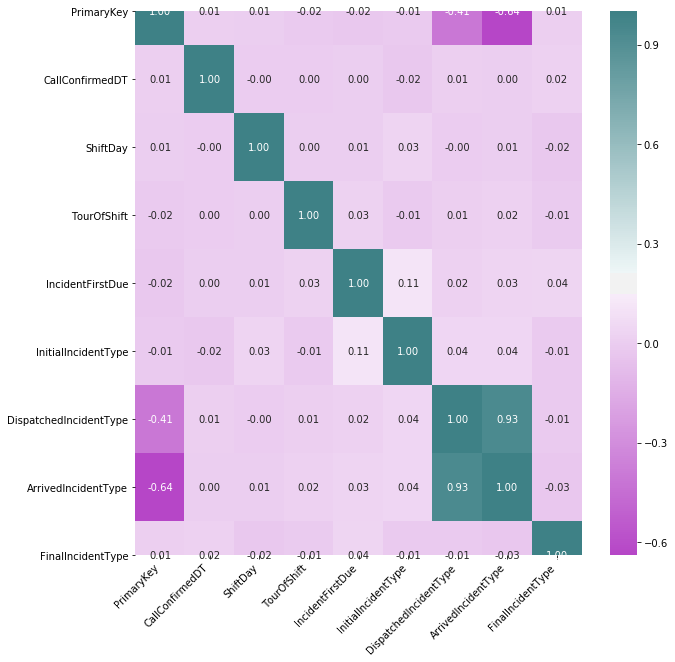

In [45]:
correlations = df_master.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(300, 200, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colnames,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colnames);
plt.show()